### Ван-дер-Ваальс

В этот раз ищем линию конденсации газа Ван-дер-Ваальса:

In [1]:
import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt

from scipy.special import roots_legendre

Задаем параметр изотермы и точность:

In [2]:
t = 0.88
eps0 = 10e-3

Около технические вещи типа: уравнение на давление, матрица для поиска его корней, сжатие пределов интегрирования, само интегрирование:

In [3]:
def p(v):
    p = - 3/(v**2) + (8*t/3)/(v - 1/3)
    return p

In [4]:
def M(p):
    M = ([[0., 0., 1/p],
          [1., 0, -3/p],
          [0., 1., (1/3+8*t/(3*p))]])
    return M

In [5]:
def lim_true(f, a, b, x):
    
    return (b - a)/2 * f((a + b)/2 + (a - b)*x/2)

In [14]:
def leg_3(f, a, b):
    
    roots, weights = roots_legendre(3)
    res = np.sum(lim_true(f, a, b, roots) * weights)
    return res

Самое главное!:

In [13]:
MM = ([[0., 0., 1/(4*t)],
       [1., 0, -6/(4*t)],
       [0., 1., 9/(4*t)]])

vv, ww = la.eig(MM)
vv = np.delete(vv, 0)
p_ = p(np.min(vv))
_p = p(np.max(vv))
eps = 1

while abs(eps)>eps0:
    
    #print('----')
    v, w = la.eig(M((_p+p_)/2))
    v_ = np.min(v)
    _v = np.max(v)
    
    eps = leg_3(p, v_, _v) - (_v-v_) * (_p+p_)/2
    
    if eps > 0:
        #print('^')
        p_ = (_p+p_)/2
        
    if eps <= 0:
        #print('|')
        _p = (_p+p_)/2
    
print('eps = ',eps)
print('p* = ', (_p+p_)/2)

eps =  0.009253332716632423
p* =  0.5736498822264848


И картиночка, конечно:

<IPython.core.display.Javascript object>


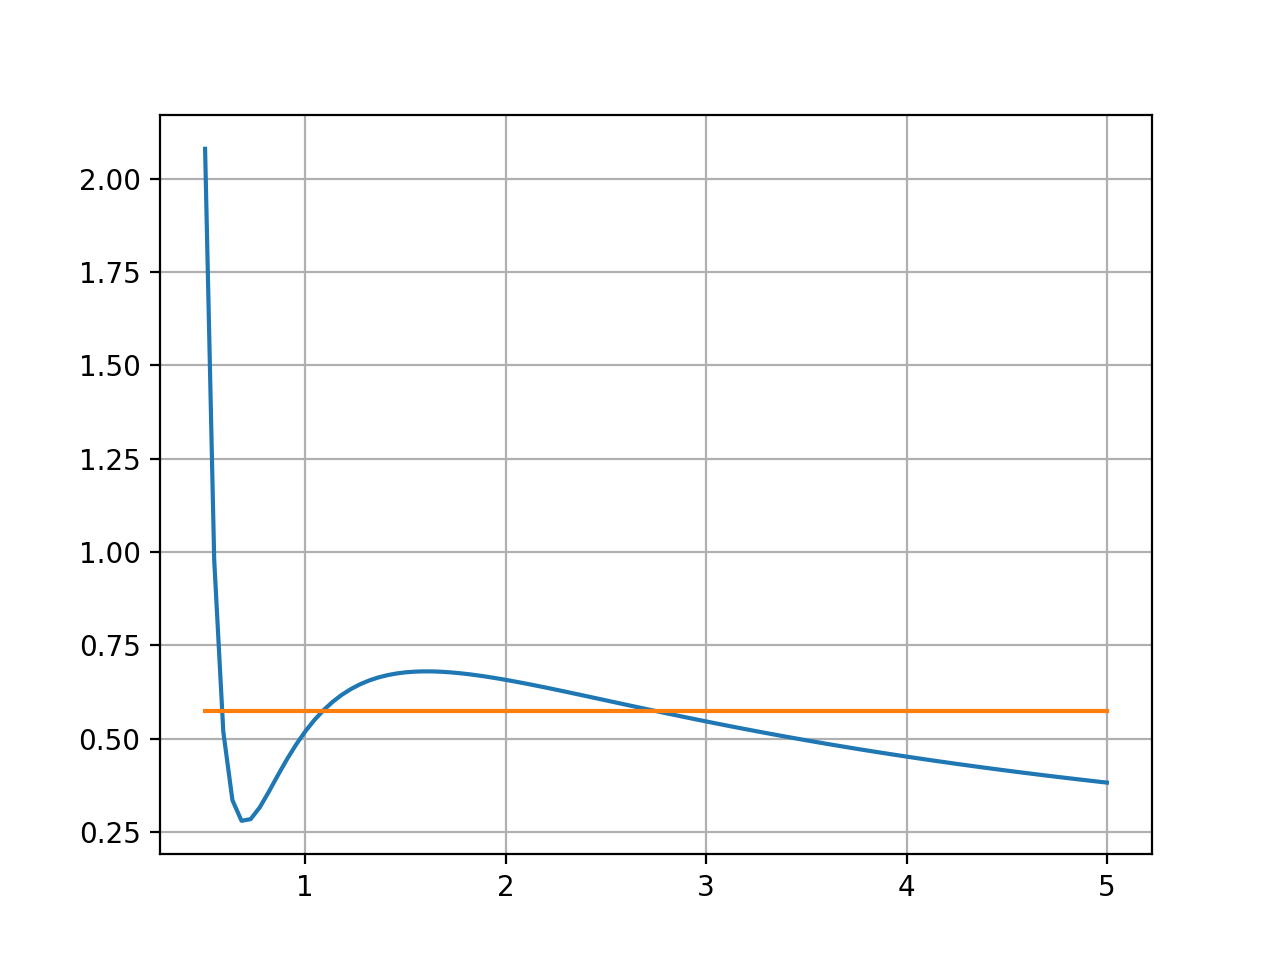

In [9]:
%matplotlib notebook

v = np.linspace(0.5, 5, 100)
plt.plot(v, p(v))
plt.plot(v, np.ones(len(v))*(_p+p_)/2)
plt.grid()